based on https://www.kaggle.com/competitions/word2vec-nlp-tutorial/overview

In [1]:
!cp kaggle.json /content

In [2]:
!ls /content

/content


In [3]:
import numpy as np
import pandas as pd 

In [4]:
!pip install kaggle --upgrade

In [5]:

## set up custom path to kaggle.json: 
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

from pathlib import Path
path = Path('word2vec-nlp-tutorial')
if not path.exists():
    import zipfile,kaggle
    kaggle.api.competition_download_cli(str(path))
    # for each zip file in the path unzip it
    for f in path.glob('*.zip'):
        zipfile.ZipFile(f).extractall(path)

transformers as per https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners

In [6]:
test = pd.read_csv( path/"testData.tsv", delimiter="\t", quoting=3)

<AxesSubplot: >

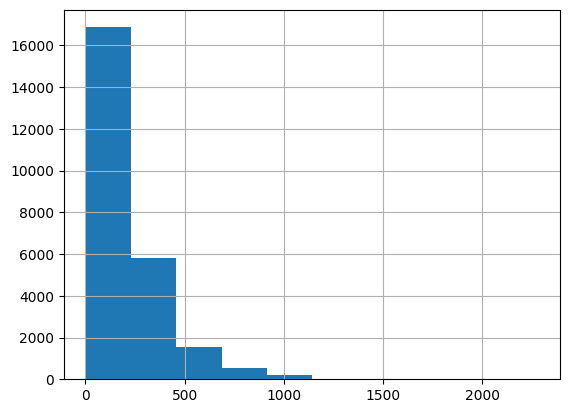

In [28]:
lengths = test.review.apply(lambda x: len(x.split()))
lengths.hist()

In [32]:
len500 = (lengths > 500).sum()
len500, len500 / len(lengths)

(1885, 0.0754)

In [7]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [8]:
classifier(test.review[0]), test.review[0]

([{'label': 'POSITIVE', 'score': 0.9996938705444336}],
 '"Naturally in a film who\'s main themes are of mortality, nostalgia, and loss of innocence it is perhaps not surprising that it is rated more highly by older viewers than younger ones. However there is a craftsmanship and completeness to the film which anyone can enjoy. The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger. Naturally Joyce\'s short story lends the film a ready made structure as perfect as a polished diamond, but the small changes Huston makes such as the inclusion of the poem fit in neatly. It is truly a masterpiece of tact, subtlety and overwhelming beauty."')

In [9]:
classifier(list(test.review[:3]))

[{'label': 'POSITIVE', 'score': 0.9996938705444336},
 {'label': 'NEGATIVE', 'score': 0.9977385997772217},
 {'label': 'POSITIVE', 'score': 0.8819959759712219}]

In [ ]:
# preds = classifier(list(test.review)) ## does not work with all the data

In [19]:
!pip show transformers

Name: transformers
Version: 4.21.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache
Location: /usr/local/lib/python3.9/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, tokenizers, tqdm
Required-by: sentence-transformers


In [21]:
summarizer = pipeline("summarization")
summarizer(test.review[0]), test.review[0]

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


([{'summary_text': ' There is a craftsmanship and completeness to the film which anyone can enjoy . The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger .'}],
 '"Naturally in a film who\'s main themes are of mortality, nostalgia, and loss of innocence it is perhaps not surprising that it is rated more highly by older viewers than younger ones. However there is a craftsmanship and completeness to the film which anyone can enjoy. The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger. Naturally Joyce\'s short story lends the film a ready made structure as perfect as a polished diamond, but the small changes Husto

In [33]:

summarized_reviews = summarizer(list(test.review[:10])) # 3 sec per example. for ~2000 examples it will take ~1.5 hours

Your max_length is set to 142, but you input_length is only 76. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=38)


In [34]:
summarized_reviews

[{'summary_text': ' There is a craftsmanship and completeness to the film which anyone can enjoy . The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger .'},
 {'summary_text': ' "This movie is a disaster within a disaster film. It is full of great action scenes, which are only meaningful if you throw away all sense of reality" "Hard to believe somebody read the scripts for this and allowed all this talent to be wasted," says Tom Charity .'},
 {'summary_text': ' "All in all, this is a movie for kids. At one point my kid\'s excitement was so great that sitting was impossible" "I am a great fan of A.A. Milne\'s books which are very subtle and hide a wry intelligence behind the childlike quality of its leading characters. This film was not subtle. It seems a shame that Disney cannot see the benefit of 

In [30]:
summarized_reviews = pd.DataFrame(summarized_reviews)
summarized_reviews.summary_text

0     There is a craftsmanship and completeness to ...
1     "This movie is a disaster within a disaster f...
2     "All in all, this is a movie for kids. At one...
Name: summary_text, dtype: object

In [37]:
# so lets just cut the reviews to 500 words and then do sentiment analysis
test['review'] = test.review.apply(lambda x: ' '.join(x.split()[:300]))

In [38]:
preds = classifier(list(test.review)) # given that 1 example takes 0.1 sec to process, 25000 will take 2500 sec or ~40 min

RuntimeError: The size of tensor a (514) must match the size of tensor b (512) at non-singleton dimension 1

In [36]:
submission = Dataset.from_dict({
    'id': eval_ds['id'],
    'sentiment': preds
})

submission.to_csv('submission.csv', index=False)

Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

432792

In [37]:
!head submission.csv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
id,sentiment
"""12311_10""",[1]
"""8348_2""",[1]
"""5828_4""",[1]
"""7186_2""",[0]
"""12128_7""",[1]
"""2913_8""",[1]
"""4396_1""",[0]
"""395_2""",[1]
"""10616_1""",[0]


even such a limited model trained only on first 100 words of a sentence gives better score: Score: 0.893 over 0.84 for bag of words/RF version. It is approximately 250 position on the leaderboard fixed 8 years ago :)